# 题目

> 你有 k 个服务器，编号为 0 到 k-1 ，它们可以同时处理多个请求组。每个服务器有无穷的计算能力但是 不能同时处理超过一个请求 。请求分配到服务器的规则如下：  
1. 第 i （序号从 0 开始）个请求到达。
2. 如果所有服务器都已被占据，那么该请求被舍弃（完全不处理）。
3. 如果第 (i % k) 个服务器空闲，那么对应服务器会处理该请求。
4. 否则，将请求安排给下一个空闲的服务器（服务器构成一个环，必要的话可能从第 0 个服务器开始继续找下一个空闲的服务器）。比方说，如果第 i 个服务器在忙，那么会查看第 (i+1) 个服务器，第 (i+2) 个服务器等等。

> 给你一个严格递增的正整数数组 arrival ，表示第 i 个任务的到达时间，和另一个数组 load ，其中 load[i] 表示第 i 个请求的工作量（也就是服务器完成它所需要的时间）。你的任务是找到最繁忙的服务器。最繁忙定义为一个服务器处理的请求数是所有服务器里最多的。  
请你返回包含所有最繁忙服务器序号的列表，你可以以任意顺序返回这个列表。

> 示例1：  
输入：k = 3, arrival = [1,2,3,4,5], load = [5,2,3,3,3]   
输出：[1]   
解释：  
所有服务器一开始都是空闲的。  
前 3 个请求分别由前 3 台服务器依次处理。  
请求 3 进来的时候，服务器 0 被占据，所以它被安排到下一台空闲的服务器，也就是服务器 1 。  
请求 4 进来的时候，由于所有服务器都被占据，该请求被舍弃。  
服务器 0 和 2 分别都处理了一个请求，服务器 1 处理了两个请求。所以服务器 1 是最忙的服务器。

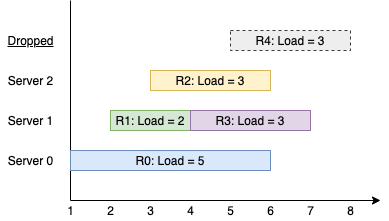

# 方法一：模拟 + 双优先队列

> 分别用两个优先队列 available 和 busy 储存当前的空闲服务器和当前正在忙的服务器。  
遍历所有请求，每当有一个新请求进来时， available 和 busy 都可能发生变化。  
设在第 i 个请求到来时，编号为 id 的服务器已经处理完请求，那么将 id 从 busy 中移除，并放入一个不小于 i 且同余于 id 的编号，这样就能在保证 available 中，编号小于 i  mod  k 的空闲服务器能排到编号不小于 i  mod  k 的空闲服务器后面。

## 复杂度

- 时间复杂度: $O((k+n)logk)$ 或 $O(k+nlogk)$ ，其中 $k$ 是服务器总数， $n$ 是请求总数。

> 开始时 available 放入所有的服务器的时间复杂度为 $O(klog⁡k)$ 或 $O(k)$ ，取决于语言实现；在处理请求时，busy 最多执行 n 次放入和移除操作，available 最多执行 n 次放入和移除操作，因此时间复杂度为 $O(nlog⁡k)$ （ $O(log⁡k)$ 是小顶堆的操作复杂度）；获取最繁忙服务器列表的时间复杂度为 $O(k)$ 。

- 空间复杂度: $O(k)$ ，其中 $k$ 是服务器总数。

> busy和 available 最多放入 k 个元素，需要 $O(k)$ 的空间；requests 需要 $O(k)$ 的空间。

## 代码

In [1]:
from heapq import *

In [2]:
class Solution:
    def busiestServers(self, k, arrival, load):
        
        available = list(range(k))  # 用于存储空闲服务器的编号
        busy = []  # 优先队列，用于存储正在处理请求的服务器的处理结束时间和编号，按处理结束时间从左到右升序排列
        requests = [0] * k  # 记录各个服务器总共处理的请求数
        
        # 遍历所有请求
        # zip将每个请求的到达时间和工作量打包为一个set
        # i→请求的编号；start→请求的到达时间；t→请求的工作量
        for i, (start, t) in enumerate(zip(arrival, load)):
            
            # 若请求i的到达时间在某服务器最早的处理结束时间之后，说明有服务器可以用来处理请求i       
            while busy and busy[0][0] <= start:
                _, id = heappop(busy)  # 弹出处理结束时间最早的服务器的编号id
                # 负数(id - i)取模会变成变成同余的非负数，即((id - i) % k) % k = (id - i) % k
                # (id - i) % k是一个位于区间[0,k-1]的数
                # 这使得编号小于 i  mod  k 的空闲服务器可以排到编号不小于 i  mod  k 的空闲服务器后面
                heappush(available, i + (id - i) % k)  # heappush保证了available是从左到右依次递增的列表
            
            # 若空闲服务器存在
            if available:
                id = heappop(available) % k  # 取余后才是服务器的真正编号
                requests[id] += 1  # 第id个服务器处理的总请求数+1
                heappush(busy, (start + t, id))  # 将当前任务的[结束时间,服务器编号]按排序压入busy，说明第id个服务器正在忙
        
        maxRequest = max(requests)  # 最大请求数
        
        # 返回一个列表，其中包含每个总请求数等于最大请求数的服务器编号
        return [i for i, req in enumerate(requests) if req == maxRequest]

#### 测试一

In [5]:
k = 3
arrival = [1,2,3,4,5]
load = [5,2,3,3,3]

test = Solution()
test.busiestServers(k, arrival, load)

[1]

#### 测试二

In [6]:
k = 3
arrival = [1,2,3]
load = [10,12,11]

test = Solution()
test.busiestServers(k, arrival, load)

[0, 1, 2]